
By creating a word cloud from each level of reviews I can identify words that are commonly used. I will then generate 10 random reviews from each star level based on the wordcloud to conduct further analysis. I will then create a list of words that are used to describe food quality and overall service/experience.

In [1]:
#WORDCLOUD CODE MODIFIED FROM @megan3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import regex as re
import spacy
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Read data in chuncks because it is a large dataset (@mmasc4492)
chunks = []

r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32} 

# Store the json chunks
reader = pd.read_json('../input/yelp-dataset/yelp_academic_dataset_review.json',
                      lines=True,
                      chunksize=1000,
                      dtype=r_dtypes,
                      orient='records')

# For loop to append each chunk into the chunks list
for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id'])\
                             .query("`date` >= '2018-12-31'")
        chunks.append(reduced_chunk)

# Concatenate each chunk into a single dataframe        
reviews = pd.concat(chunks, ignore_index=True)

# Update the set of stopwords to include some found in the reviews.
stop_words = STOPWORDS.update(["area", "will", 'wasnt', 'n', 'nthe'])

There are 396374 reviews marked with 1 star.
10 (Random) 1-Star Reviews:
Review 1: I got the chicken rollers and fish taco. It made me sick with food poisoning. Very disappointed
Review 2: They don't even deserve 1 star! I brought my sister in as she was experiencing horrible abdominal pain and vomiting. She was screaming and crying for help and the guy up front constantly rolled his eyes at me when I asked how much longer we have to wait or if they could give her any medicine to help with her pain. He pretty much told me I would have to sit there and wait all day and that her vitals were ok so she will be fine. We left and went to Urgent Care and they said her blood pressure was really low and that she was dehydrated. You're better off sitting at home if you're in pain than going to Mercy! HORRIBLE staff!!
Review 3: Strangest shopping experience ever. New to Nashville and my best friend came to visit and we scoped out this shop. We found several pieces that we loved and were super imp

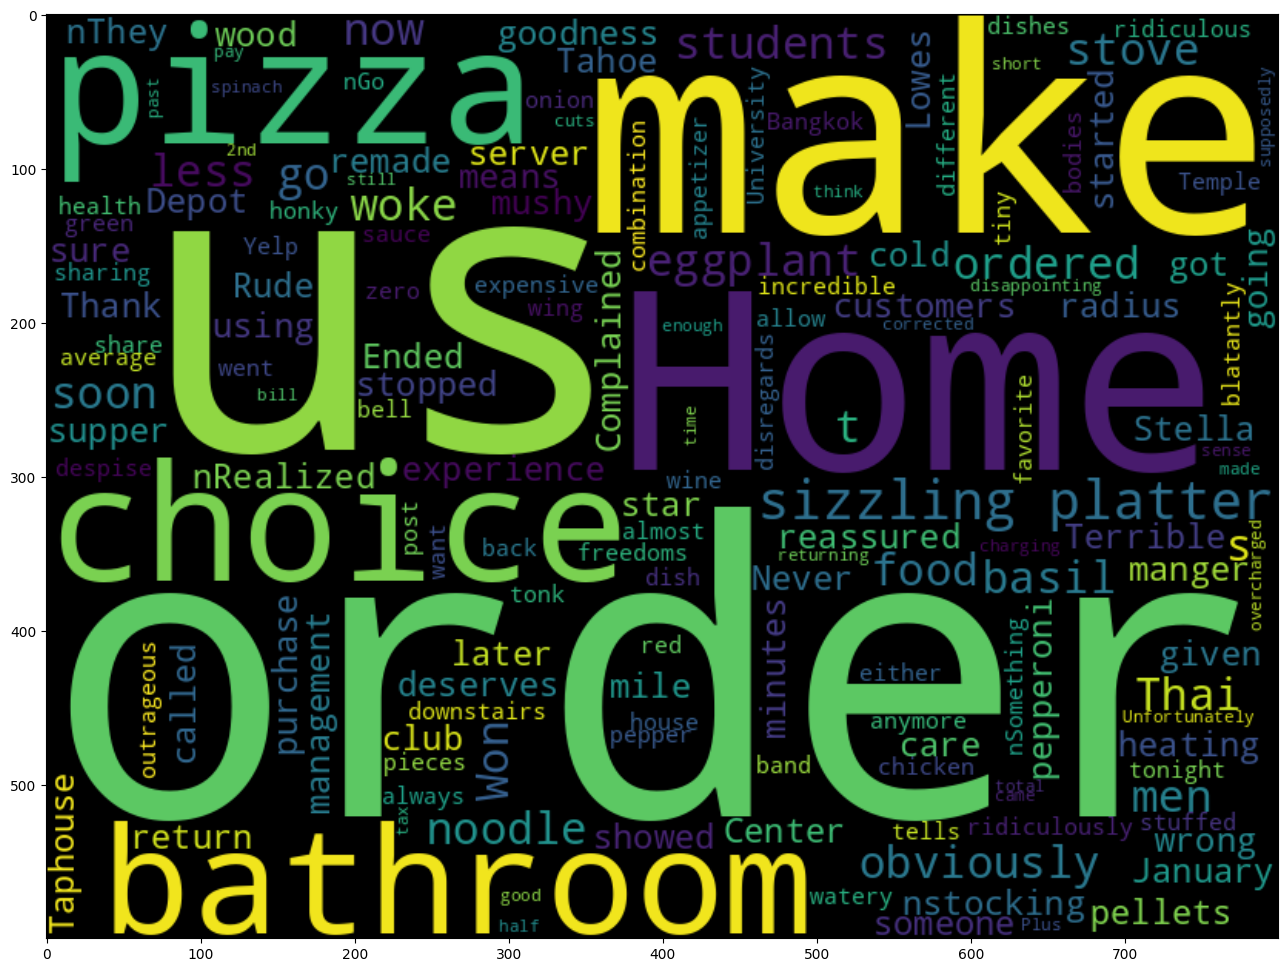

In [3]:
# 1 star review cloud
reviews_1 = reviews.loc[(reviews.stars < 2), :].copy()
reviews_1.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_1.shape[0]} reviews marked with 1 star.")

text_big_1 = "".join(str(reviews_1.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_1)
wc.to_file("/kaggle/working/yelp_wordcloud_1.jpg")
plt.imshow(wc, interpolation = 'bilinear')

# pull 10 reviews that include the wordcloud keywords(help from ChatGPT)
word_cloud_words = set(wc.words_.keys())
filtered_reviews_1 = reviews_1[reviews_1['text'].apply(lambda review: any(word in review for word in word_cloud_words))]
random_reviews_1 = filtered_reviews_1.sample(n=10, random_state=42)
print("10 (Random) 1-Star Reviews:")
for i, review in enumerate(random_reviews_1['text'], 1):
    print(f"Review {i}: {review}")

There are 144345 reviews marked with 2 stars.
10 (Random) 2-Star Reviews:
Review 1: This was recommended by the rental car desk person. And was the number 1 place for tacos on yelp. So I drove 30 min one way to get there and was very disappointed. I got the fish taco which tasted very fishy. Also had the al pastor and the pork was very dried out. Some of the worst tacos I have had. The atmosphere and the vibe is chipotle-like. I got the chips which are free if you spend at least 5$ which were sitting in this heater and were not fresh. The salsa was generic and the salsa bar had not been cleaned for quite a while.
Review 2: It's been over year since I've eaten at this place. We specifically asked for well done wings... What do you think... they came out as they normally do.  Not well done.  

The food seems to always be mediocre and they don't quite get it when we ask for something it needs to be completed as requested

The only reason I gave it to was the waitress was nicer than last t

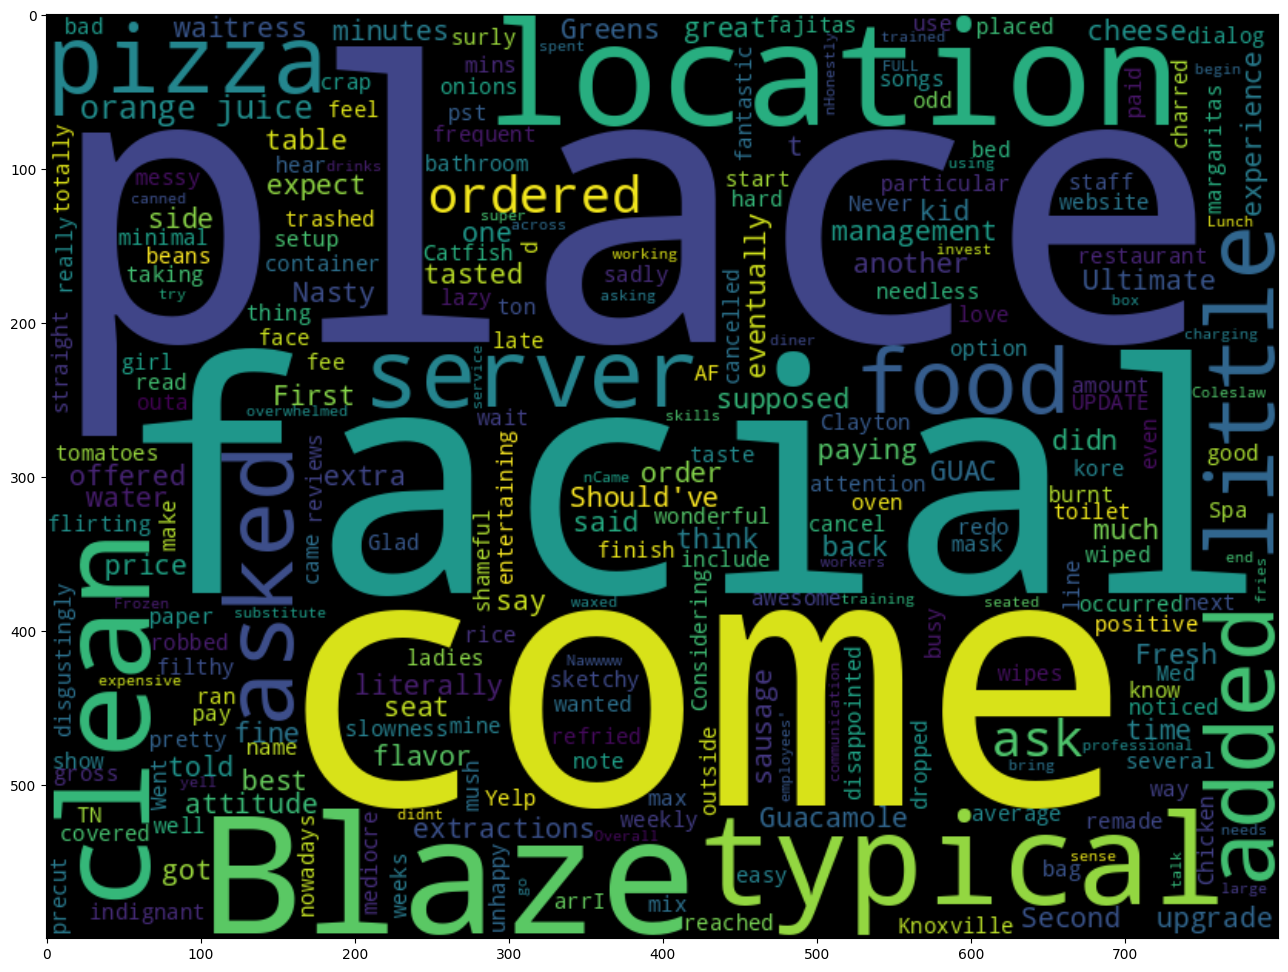

In [4]:
# 2 star review cloud
reviews_2 = reviews.loc[(reviews.stars < 3) & (reviews.stars >1), :].copy()
reviews_2.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_2.shape[0]} reviews marked with 2 stars.")

text_big_2 = "".join(str(reviews_2.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_2)
wc.to_file("/kaggle/working/yelp_wordcloud_2.jpg")
plt.imshow(wc, interpolation = 'bilinear')

# pull 10 reviews that include the wordcloud keywords(help from ChatGPT)
word_cloud_words = set(wc.words_.keys())
filtered_reviews_2 = reviews_2[reviews_2['text'].apply(lambda review: any(word in review for word in word_cloud_words))]
random_reviews_2 = filtered_reviews_2.sample(n=10, random_state=42)
print("10 (Random) 2-Star Reviews:")
for i, review in enumerate(random_reviews_2['text'], 1):
    print(f"Review {i}: {review}")

There are 157589 reviews marked with 3 stars.
10 (Random) 3-Star Reviews:
Review 1: This family restaurant is pretty good, the food was pretty good. The staff are very friendly, the only thing I wasn't to excited about was the chips and salsa. The chips tasted as if they were stale. But everything else was decent. Definitely planning to come back to give them another try
Review 2: Good food at a good price. Local spot that fulfills the craving for Thai food. The order was ready when expected.
Review 3: Cute playground in a nice area. Beware the park closes at dusk. I was locked inside the gates. No warnings whatsoever. I had to jump the fence. Thank goodness this guy walking by wheeled over a big trash can and I still had to jump to land on it.
Review 4: We've been to the Tin Roof in other cities and this one was basically like all of the others. It's a decent place with decent food. We went on a Thursday afternoon and the place was dead, which is to be expected. Domestic pitchers were

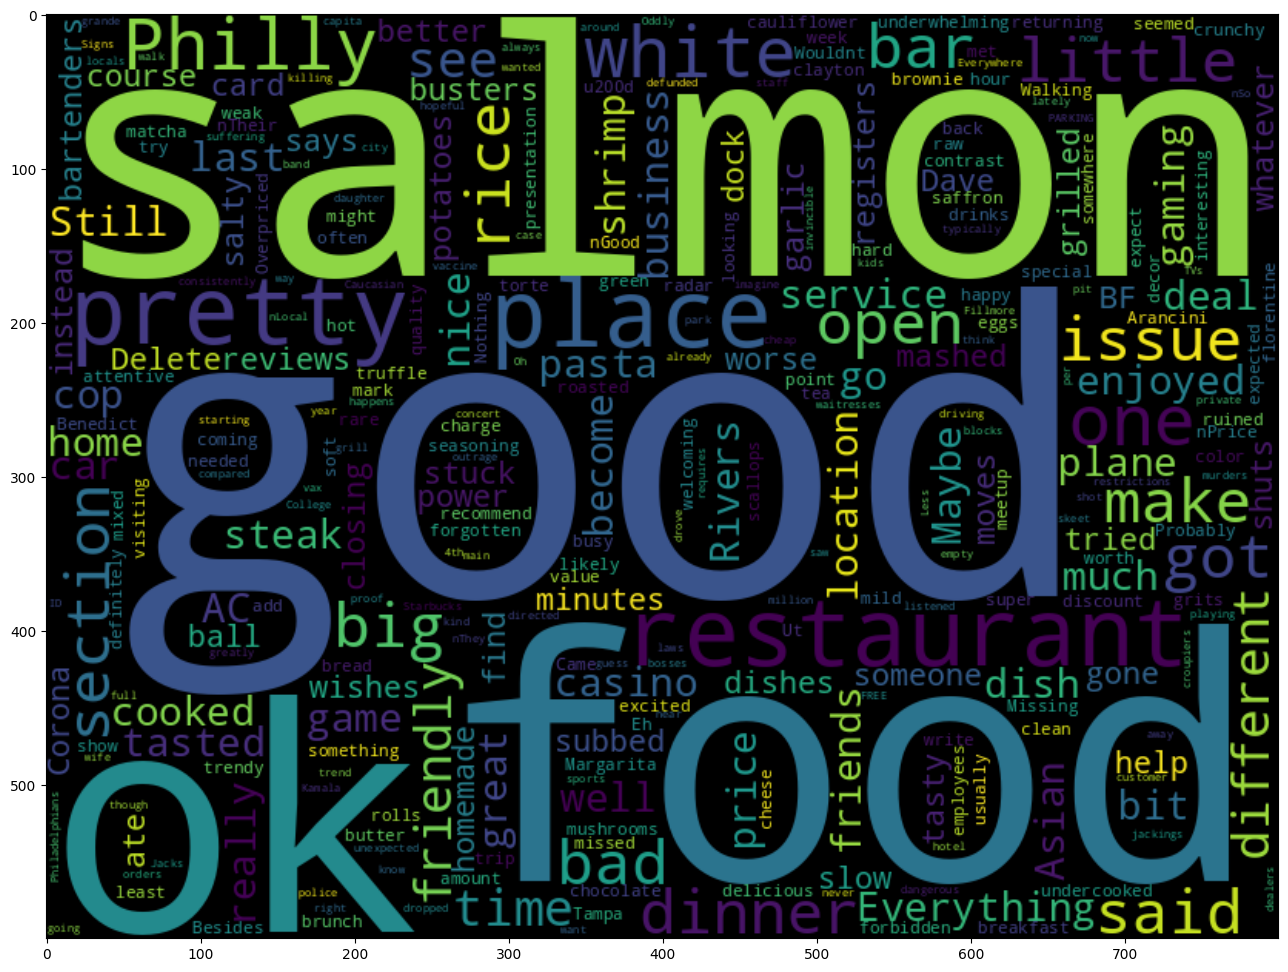

In [5]:
# 3 star review cloud
reviews_3 = reviews.loc[(reviews.stars < 4) & (reviews.stars >2), :].copy()
reviews_3.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_3.shape[0]} reviews marked with 3 stars.")

text_big_3 = "".join(str(reviews_3.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_3)
wc.to_file("/kaggle/working/yelp_wordcloud_3.jpg")
plt.imshow(wc, interpolation = 'bilinear')

# pull 10 reviews that include the wordcloud keywords(help from ChatGPT)
word_cloud_words = set(wc.words_.keys())
filtered_reviews_3 = reviews_3[reviews_3['text'].apply(lambda review: any(word in review for word in word_cloud_words))]
random_reviews_3 = filtered_reviews_3.sample(n=10, random_state=42)
print("10 (Random) 3-Star Reviews:")
for i, review in enumerate(random_reviews_3['text'], 1):
    print(f"Review {i}: {review}")


There are 396374 reviews marked with 4 stars.
10 (Random) 4-Star Reviews:
Review 1: I'm a sucker for a good hotdog so when I saw this place was open I had to try it.  I went with the Brisket Dawg, my wife tried the Chili Dawg and our kids played with the regular Dawg. Overall good food and appropriate portions; my only wish was that the fries were fresh and hot from the fryer.  Will be back!
Review 2: This place was really impressive, especially for a chain! The menu was thoughtful and pretty extensive, the food was delicious, and the view of the lakeshore sunset can't be beat. Will definitely be back!
Review 3: well coming from Chicago and reading the reviews in Florida I was doing a favor for a friend of washing his car from our long road trip from Chicago since he has a place of his own down here and I wanted to go for a vacation on the second time so just being nice I would recommend this car wash the owner was very friendly and prices were pretty decent if you get if you drive an 

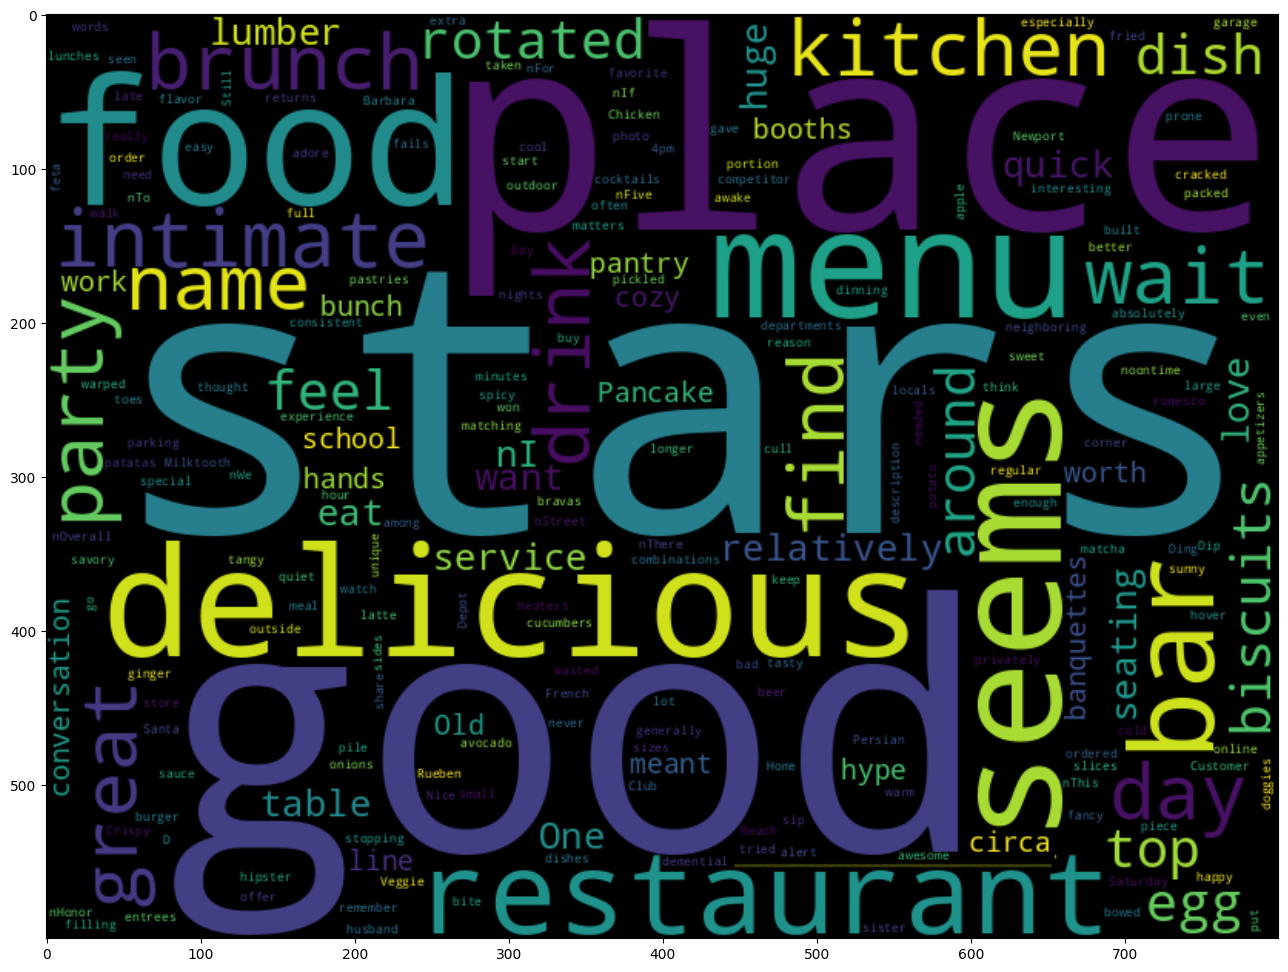

In [6]:
# 4 star review cloud
reviews_4 = reviews.loc[(reviews.stars < 5) & (reviews.stars > 3), :].copy()
reviews_4.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_1.shape[0]} reviews marked with 4 stars.")

text_big_4 = "".join(str(reviews_4.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_4)
wc.to_file("/kaggle/working/yelp_wordcloud_4.jpg")
plt.imshow(wc, interpolation = 'bilinear')

# pull 10 reviews that include the wordcloud keywords(help from ChatGPT)
word_cloud_words = set(wc.words_.keys())
filtered_reviews_4 = reviews_4[reviews_4['text'].apply(lambda review: any(word in review for word in word_cloud_words))]
random_reviews_4 = filtered_reviews_4.sample(n=10, random_state=42)
print("10 (Random) 4-Star Reviews:")
for i, review in enumerate(random_reviews_4['text'], 1):
    print(f"Review {i}: {review}")

There are 1110001 reviews marked with 5 stars.
10 (Random) 5-Star Reviews:
Review 1: I have been going to these Doctors since 2011....and even though the business has gone through changes...the quality of adjustments has never gone down.    I have pretty consistent SI issues...and an adjustment  gets me up and going again.    THANK YOU !    I am going to get the 4 adjustments package again...really a great deal.   79 dollars for 4 adjustments within 30 days.    No appointment needed...just stop by when you need an adjustment!     Please give this place a try for hassle free, skilled, caring, adjustments.
Review 2: I was searching for a bottomless brunch spot while my friends were in town and the Hadley did not disappoint! From the moment we walked in, we were impressed by the amazing interior. Probably one of the nicest places I've ever been to for brunch. There was also outdoor seating available. 

We ended up each ordering a meal (hang over sandwich for my and my friend and bacon bur

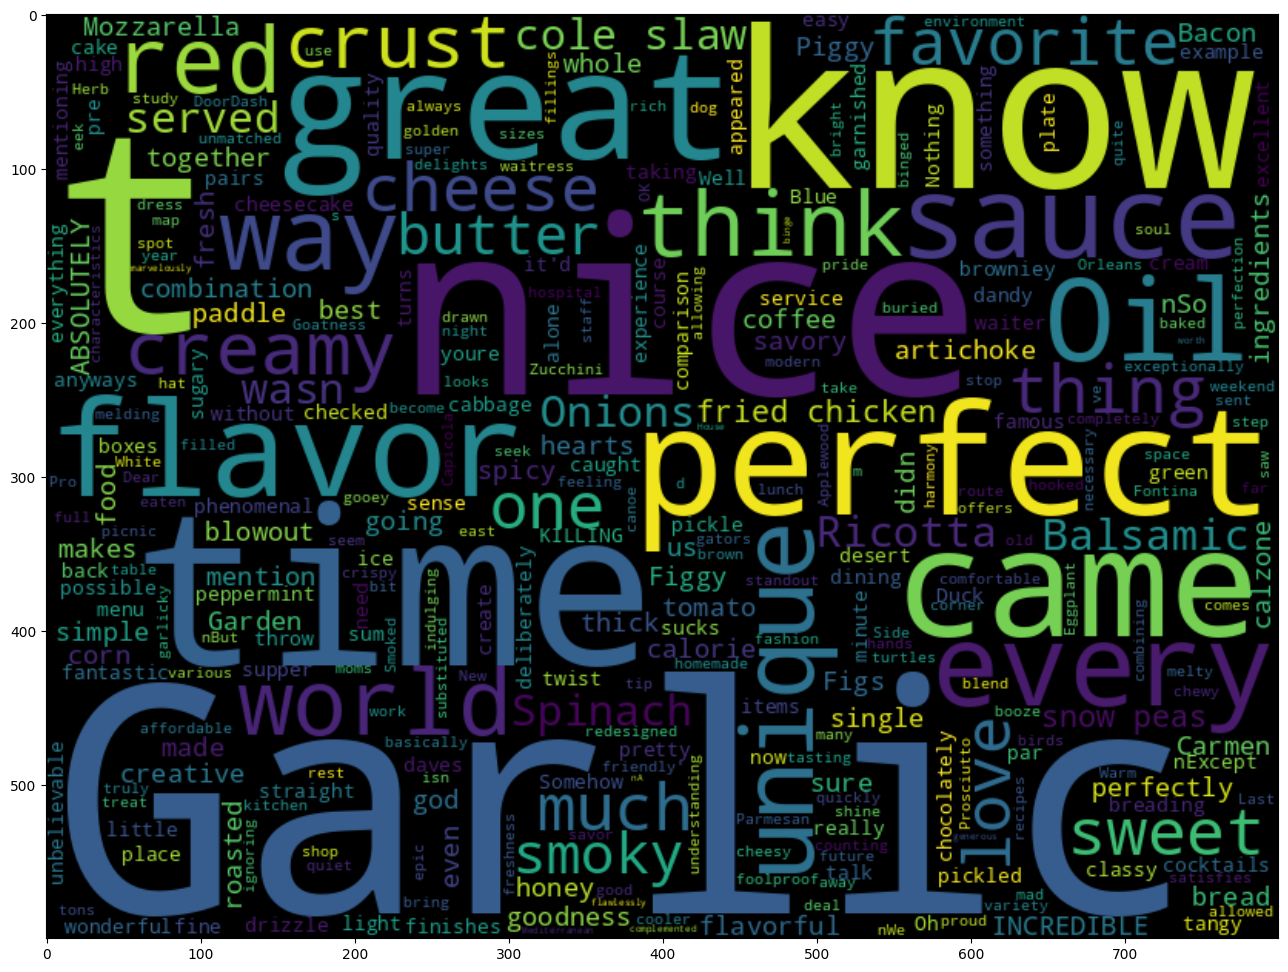

In [7]:
# 5 star review cloud
reviews_5 = reviews.loc[(reviews.stars < 6) & (reviews.stars >4), :].copy()
reviews_5.dropna(subset=['text'], inplace=True) # drop empty reviews
print(f"There are {reviews_5.shape[0]} reviews marked with 5 stars.")

text_big_5 = "".join(str(reviews_5.text.values))
plt.figure(figsize = (16,12))
wc = WordCloud(max_words = 3000, width = 800, 
    height = 600, stopwords = STOPWORDS).generate(text_big_5)
wc.to_file("/kaggle/working/yelp_wordcloud_5.jpg")
plt.imshow(wc, interpolation = 'bilinear')

# pull 10 reviews that include the wordcloud keywords(help from ChatGPT)
word_cloud_words = set(wc.words_.keys())
filtered_reviews_5 = reviews_5[reviews_5['text'].apply(lambda review: any(word in review for word in word_cloud_words))]
random_reviews_5 = filtered_reviews_5.sample(n=10, random_state=42)
print("10 (Random) 5-Star Reviews:")
for i, review in enumerate(random_reviews_5['text'], 1):
    print(f"Review {i}: {review}")